In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import matplotlib
import sys
import errno
import os
from pathlib import Path
import json
from databehandling import read_flex_rectangular, chart_axes, get_modulus

## Naming and references to data

In [2]:
# report_name is the name of the folder that this script expects the contents to be in
# relative to root
report_name = "Assignment 2"
data_folder = "test_data"
output_folder = "output"

# The lengths in the config files didn't account for the grips
length_adjustment = 0

# This limits the loading of data to the specified time intervals in config file
impose_limit = False

# This timeshifts the raw data where defined in config-file to adjust for errors during sampling
impose_timeshift = False

# Metadata for test data sets
# The script expects there to exist a json file with each of these names
# inside the data_folder
# A = Wood
# B = Pulltruded unidirectional carbon fiber composite
# C = E-Glass [45/-45/0/0/0/-45/45]
# D = E-Glass [45/-45/0/0/-45/45]
# E = E-Glass [0/90/+45/-45/-45/+45/90/0]

dataset_names = ["A", "B", "C", "D", "E"]

## Style and display - matplotlib

In [3]:
# The main style of the graphs
plt.style.use("seaborn-poster")

# The style of arrows and boxes inside graphs
bbox_props = dict(boxstyle="square,pad=0.9", fc="white", ec="black", lw=1.2)
arrowprops = dict(arrowstyle="->", lw=1.2, facecolor='black')

## Checking that everything is OK and loading data

In [4]:
datasets = {}
output_path = ""
def update():
    # Home is the specific report folder, which is itself normally found in root folder
    home = Path(report_name)
    global output_path
    output_path = home / output_folder
    data_path = home / data_folder


    # If any folder does not exist, then the script will naturally fail at some point
    # So it's better to stop it already now
    folder_missing = False
    for folder in (home, output_path, data_path):
        if folder.exists() == False:
            raise FileNotFoundError(f"Specimen set folder '{folder}' is missing.")


    metadatas = {}
    # Checking that series names and config files exist
    for name in dataset_names:
        # First check that folder exists
        folder_path = Path(data_path / name)
        config_path = folder_path.with_suffix(".json")
        if not folder_path.exists():
            raise FileNotFoundError(f"Folder for series '{name}' was not found. It should be ''{folder_path}''")
        if not config_path.exists():
            raise FileNotFoundError(f"Config file for series '{name}' was not found. It should be ''{config_path}''")
        with open(config_path) as f:
            metadatas[name] = json.load(f)

    # print(metadatas)
    # Load the data from disk and place it into a dictionary
    global datasets
    datasets = {}
    for set_name, series_metadata in metadatas.items():
            specimen_series = []
            for specimen_metadata in series_metadata:
                datapath = data_path / set_name / specimen_metadata["filename"]

                # Data sets are generated by different machines, which format the
                # data slightly differently. There is a parsing function for each possibility
                # which must be specified in the config file for the dataset
                parse_function = eval(specimen_metadata["parse_function"])
                rows_to_trim = specimen_metadata["trim_rows"]
                specimen_parsed_data = parse_function(datapath, specimen_metadata, limit=impose_limit, 
                                                      timeshift_true=impose_timeshift, trim_rows=rows_to_trim)

                # The new specimen dict is the metadata + the parsed test data
                specimen = specimen_metadata
                specimen["dataframe"] = specimen_parsed_data

                specimen_series.append(specimen)
    #         print(specimen)
            datasets[set_name] = specimen_series
    print("Successfully loaded all datasets.")
update()

Successfully loaded all datasets.


Successfully loaded all datasets.
Modulus:  Wood 16918.543
Modulus:  Carbon fiber composite 128396.262
Modulus:  E-Glass [45/-45/0/0/0/-45/45] 22454.539
Modulus:  E-Glass [45/-45/0/0/-45/45] 14047.013
Modulus:  E-Glass [0/90/+45/-45/-45/+45/90/0] 14805.076


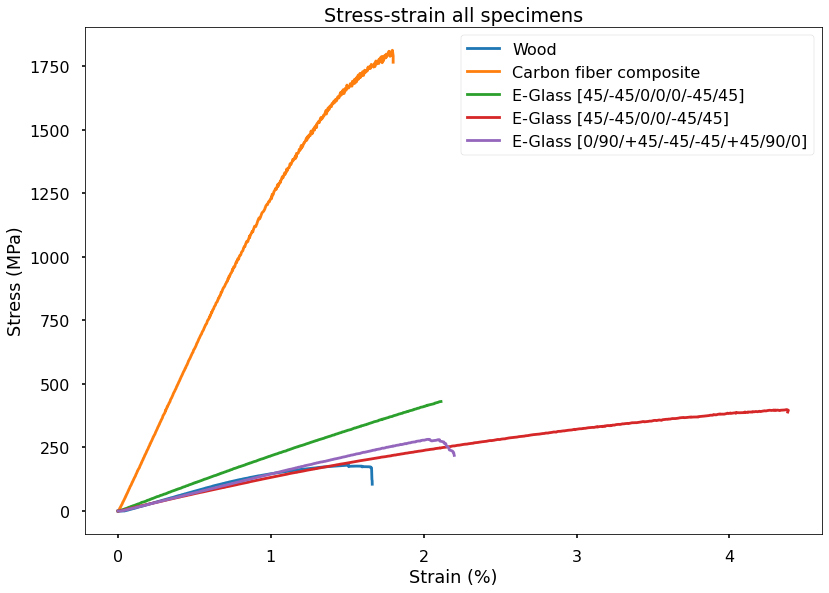

In [30]:
# Stress - Strain
update()
output_image_name = "stress_strain_all.png"
axes = chart_axes(xlabel="Strain (%)", ylabel="Stress (MPa)", title="Stress-strain all specimens")
for settnavn in datasets:
    for specimen in datasets[settnavn]:
        df = specimen["dataframe"]
        displacement = df["strain"][:]*100
        load = df["stress"][:]
        label = specimen["label"]
        axes.plot(displacement, load, label=label)
        #print(label)
        #print(get_modulus(displacement, load, 0.00, 0.04))
        #print(df.head())
        df = df[df["strain"] >= 0].dropna()
        strain = df["strain"].dropna()
        stress = df["stress"].dropna()
        modulus = get_modulus(df["strain"], df["stress"], 0.0005, 0.0025)
        print("Modulus: ", label, "{:.3f}".format(modulus))


#axes.plot([0, 0], [0,5])
axes.legend(loc="upper right")
axes.figure.savefig(output_path / output_image_name)

#df[df["time"] > 0]

In [6]:
for sett in datasets:
    print("Modulus is", get_modulus(sett)

SyntaxError: unexpected EOF while parsing (2649198781.py, line 2)

In [18]:
"{:.2f}".format(8.5555)

'8.56'